# Data Cleaning Script
#### Team 3: Austin Knighton, Keri Broughton, Cameron Bowden, Brenden Volk

This script contains data cleaning on our dataset sourced from Kaggle. The goal of our project is to identify customers that will likely default when applying for consumer loan products, particularly in emerging markets such as India. All values within each variable were collected at the time of the loan application. The risk flag variable indicates whether there has been a defaul in the past or not. 

### Import Libraries 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

### Load and Read Data

In [2]:
LoanDF = pd.read_csv("Training Data.csv")
LoanDF.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
#View data shape
LoanDF.shape

(252000, 13)

This dataset contains 252,000 rows and 13 columns. 

In [4]:
#View values stored within each variable
LoanDF.info

<bound method DataFrame.info of             Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership           Profession                 CITY  \
0

In [6]:
#View non-null count and data type
LoanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
#View summary statistics for numeric variables
LoanDF.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


[]

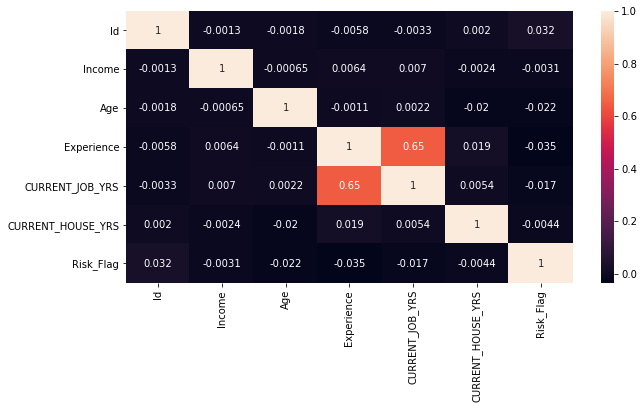

In [7]:
#View correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(LoanDF.corr(), annot=True)
plt.plot()

This correlation matrix shows that the variables 'experience' and 'current job years' have multi-collinearity. Therefore, we will need to eliminate the variable that has a weaker correlation with the risk flag. We decided to eliminate 'current job years' because the correlation with the risk flag is close to zero at 0.017. We will also eliminate 'current house years' because it has very low correlation with risk flag. We will leave income in for now. This correlation matrix does not show the categorical variables that will need to be converted into dummy codes. 

### Data Cleaning

In [7]:
#Check for null values
LoanDF.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

##### Visualization

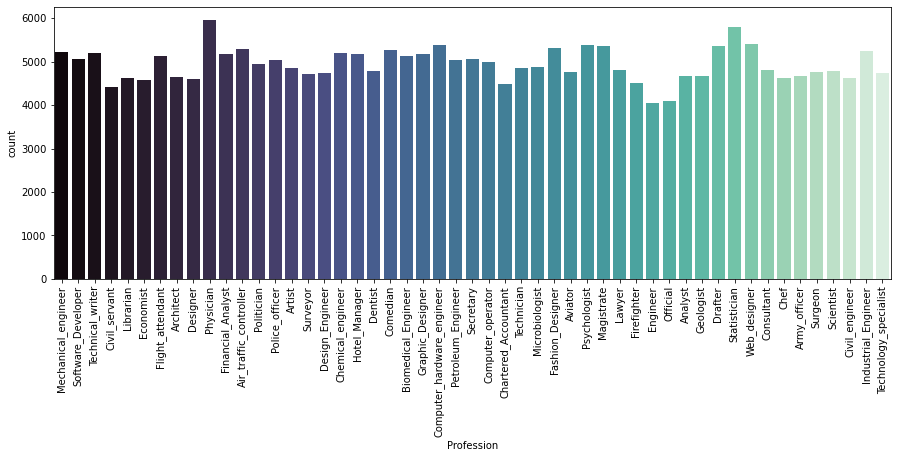

In [16]:
plt.figure(figsize=(15,5))
plt.xticks(rotation="90")
sns.countplot(x="Profession", data=LoanDF, palette='mako')
plt.show()

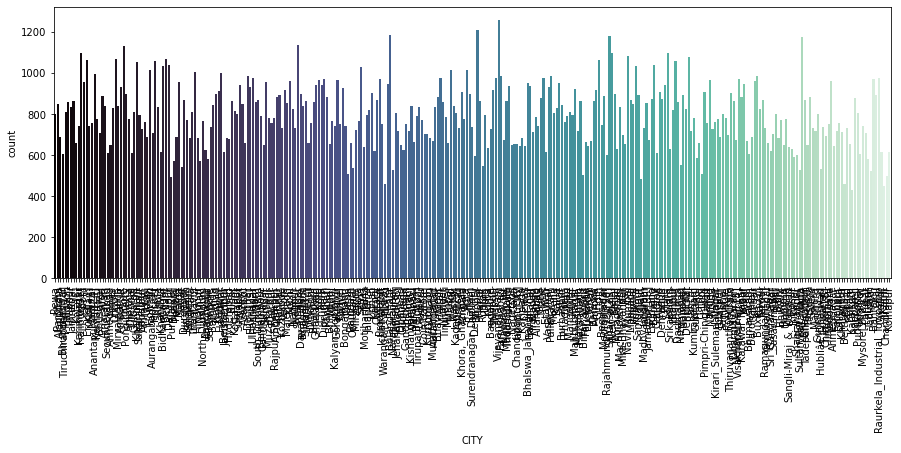

In [20]:
plt.figure(figsize=(15,5))
plt.xticks(rotation="90")
sns.countplot(x="CITY", data=LoanDF, palette='mako')
plt.show()

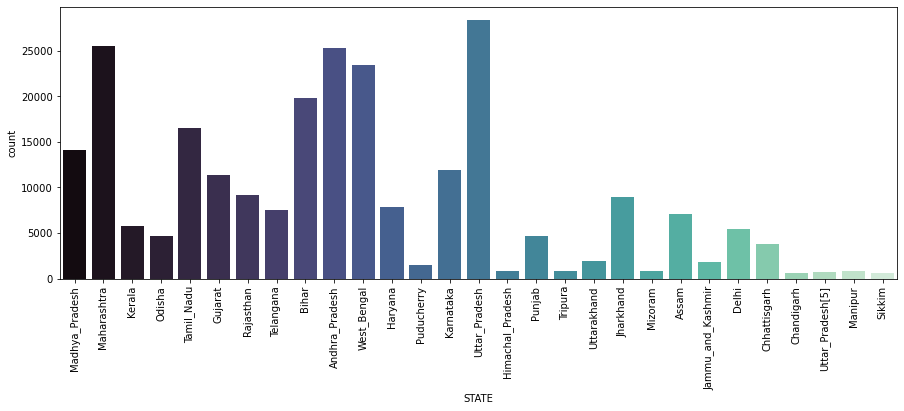

In [21]:
plt.figure(figsize=(15,5))
plt.xticks(rotation="90")
sns.countplot(x="STATE", data=LoanDF, palette='mako')
plt.show()

Profession, City and State have TOO MANY unique values. We will need eliminate these columns. 

##### Eliminate Columns
Now, we will drop the columns we discussed earlier with the correlation matrix and the variables that have to many unique values to find any meaningful information. 

In [23]:
#Drop columns
NewLoanDF = LoanDF.drop(columns = ['CITY', 'STATE', 'Profession', 'CURRENT_HOUSE_YRS','CURRENT_JOB_YRS', 'Id'])
#View remaining columns
NewLoanDF.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Risk_Flag
0,1303834,23,3,single,rented,no,0
1,7574516,40,10,single,rented,no,0
2,3991815,66,4,married,rented,no,0
3,6256451,41,2,single,rented,yes,1
4,5768871,47,11,single,rented,no,1


In [24]:
#View unique values within candidate predictor categorical variables 
NewLoanDF['Married/Single'].unique()

array(['single', 'married'], dtype=object)

In [25]:
#View unique value counts
NewLoanDF['Married/Single'].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

In [10]:
NewLoanDF['Car_Ownership'].unique()

array(['no', 'yes'], dtype=object)

In [26]:
#View unique value counts
NewLoanDF['Car_Ownership'].value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [27]:
NewLoanDF['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [28]:
NewLoanDF['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [14]:
NewLoanDF['Risk_Flag'].unique()

array([0, 1], dtype=int64)

In [30]:
NewLoanDF['Risk_Flag'].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

There is a low incidence of a customer defaulting. We will need to resolve this issue prior to training our model.

In [31]:
#Change column headings to consistent format
NewLoanDF = NewLoanDF.rename({'House_Ownership':'Home Ownership', 'Car_Ownership':'Car Ownership', 'Risk_Flag':'Risk Flag'}, axis='columns')

In [32]:
#Check to see if columns were renamed
NewLoanDF.head()

,Income,Age,Experience,Married/Single,Home Ownership,Car Ownership,Risk Flag
0,1303834,23,3,single,rented,no,0
1,7574516,40,10,single,rented,no,0
2,3991815,66,4,married,rented,no,0
3,6256451,41,2,single,rented,yes,1
4,5768871,47,11,single,rented,no,1


##### Dummy Code

In [33]:
#Dummy code categorical variables 
features = ["Income", "Age", "Experience", "Married/Single", "Home Ownership", "Car Ownership", "Risk Flag"]
NewLoanDF = pd.get_dummies(NewLoanDF[features])
print(NewLoanDF)

         Income  Age  Experience  Risk Flag  Married/Single_married  \
0       1303834   23           3          0                       0   
1       7574516   40          10          0                       0   
2       3991815   66           4          0                       1   
3       6256451   41           2          1                       0   
4       5768871   47          11          1                       0   
...         ...  ...         ...        ...                     ...   
251995  8154883   43          13          0                       0   
251996  2843572   26          10          0                       0   
251997  4522448   46           7          0                       0   
251998  6507128   45           0          0                       0   
251999  9070230   70          17          0                       0   

        Married/Single_single  Home Ownership_norent_noown  \
0                           1                            0   
1                      

In [34]:
#Drop redundant columns
NewLoanDF = NewLoanDF.drop(columns = ['Married/Single_single', 'Car Ownership_no', 'Home Ownership_norent_noown', 'Home Ownership_rented'])
NewLoanDF.head()

,Income,Age,Experience,Risk Flag,Married/Single_married,Home Ownership_owned,Car Ownership_yes
0,1303834,23,3,0,0,0,0
1,7574516,40,10,0,0,0,0
2,3991815,66,4,0,1,0,0
3,6256451,41,2,1,0,0,1
4,5768871,47,11,1,0,0,0


In [35]:
#View sample of new dataset
NewLoanDF.sample(10)

,Income,Age,Experience,Risk Flag,Married/Single_married,Home Ownership_owned,Car Ownership_yes
14560,6681037,56,15,0,0,0,0
96540,3941355,71,14,0,1,0,0
57849,7280359,21,11,1,0,0,0
231711,8786402,71,13,0,0,0,1
172994,6897815,47,14,0,0,0,1
60629,2369392,59,17,0,0,0,0
36136,1232691,43,9,0,0,0,1
99765,4022253,53,6,0,0,0,1
228731,5742111,78,7,1,0,0,1
238253,569984,42,1,1,1,0,0


In [40]:
#View new dummy code value countsto ensure they correlate with original value counts
#Rented and no own/ no rent should total the count for 0's indicating that they do not own a home. 
NewLoanDF['Home Ownership_owned'].value_counts() 

0    239082
1     12918
Name: Home Ownership_owned, dtype: int64

In [41]:
NewLoanDF['Married/Single_married'].value_counts()

0    226272
1     25728
Name: Married/Single_married, dtype: int64

In [42]:
NewLoanDF['Car Ownership_yes'].value_counts()

0    176000
1     76000
Name: Car Ownership_yes, dtype: int64

##### Rename Columns
Now we will tidy up the dataset to make it easier to use. 
We will rename new columns. 

Dummy Code Interpretation: 

Married/Single column: 1=married and 0=single 

Car Ownership: 1=owns car and  0 = doesn't own car 

Home ownership: 1=owns home and 0 = doesn't own a home

In [43]:
NewLoanDF = NewLoanDF.rename({'Married/Single_married':'Married/Single', 'Car Ownership_yes':
                              'Car Ownership', 'Home Ownership_owned':'Home Ownership' }, axis='columns')

In [44]:
#Check new column headings
NewLoanDF.head()

,Income,Age,Experience,Risk Flag,Married/Single,Home Ownership,Car Ownership
0,1303834,23,3,0,0,0,0
1,7574516,40,10,0,0,0,0
2,3991815,66,4,0,1,0,0
3,6256451,41,2,1,0,0,1
4,5768871,47,11,1,0,0,0


<AxesSubplot:>

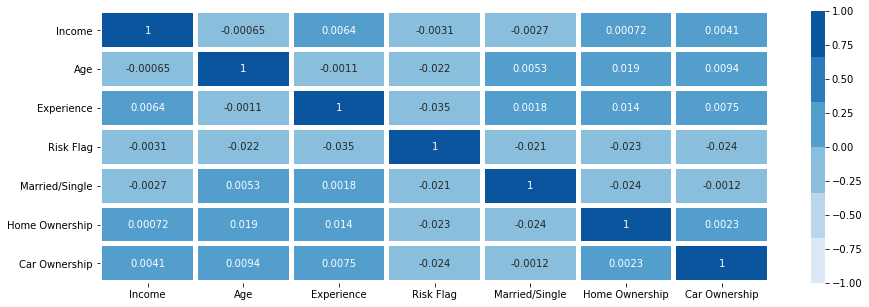

In [48]:
#View new correlation matrix
#Check correlation 

plt.figure(figsize=(15,5))
sns.heatmap(NewLoanDF.corr(), vmin=-1, vmax=1, linewidth = 4, annot=True, cmap=sns.color_palette("Blues") )

In [49]:
#Save clean data to new csv file
NewLoanDF.to_csv('NewLoanData.csv',index=False)

Now, we can explore our clean new dataset!